In [15]:
import torch, os
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
from src.models.model import VAE
from src.utils import *
from src.interact_func import *

In [16]:
model = VAE(130, 2048, 512, 32)
model.eval()
dic = torch.load('params/tr_512.pt')
for name in list(dic.keys()):
    dic[name.replace('module.', '')] = dic.pop(name)
model.load_state_dict(dic)
if torch.cuda.is_available():
    model = model.cuda()



data1 = np.load('/scratch/dw1920/batch_0.npy')
# data2 = np.load('/scratch/dw1920/batch_1.npy')
# data3 = np.load('/scratch/dw1920/batch_2.npy')

In [17]:
# data = torch.from_numpy(np.concatenate(np.array([data1, data2]), 0)).float().cuda()

all_z = []
batch_size = 1000
for i in range(5):
    data = torch.from_numpy(data1[i*batch_size:(i+1)*batch_size]).float().cuda()
    z = model.encode(data).mean
    all_z.append(z)
    print(i)


0
1
2
3
4


In [18]:
type(all_z[0])

torch.Tensor

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for i in range(len(all_z)):
    all_z[i] = all_z[i].cpu().detach().numpy()
x=np.concatenate(np.array(all_z), 0)
X_scaler = StandardScaler()
x = X_scaler.fit_transform(x)
pca = PCA(n_components=128)
pca.fit(x)
pca.transform(x)

array([[-1.2615542 , -2.2263117 ,  0.8897488 , ...,  0.03317183,
        -0.09226421,  0.34385967],
       [ 0.8389838 ,  1.1704395 ,  0.31019267, ..., -0.12176513,
         0.22630328,  0.12055749],
       [-0.99568903,  0.30684435, -1.1774368 , ...,  0.71297   ,
         0.854703  , -0.33980358],
       ...,
       [11.064863  , -7.722664  ,  0.87898755, ..., -1.0022595 ,
         0.39759946, -0.5521507 ],
       [ 3.7771738 ,  0.991492  ,  9.9278    , ..., -0.44660226,
         0.38607597,  0.32532632],
       [ 5.0934505 , -1.835253  ,  2.7705803 , ..., -0.9632384 ,
         0.01559624, -0.45758602]], dtype=float32)

In [20]:
cov_mat = np.cov(x, rowvar = 0)

In [21]:
sigma = cov_mat
[U,S,V] = np.linalg.svd(sigma)

In [22]:
s_out = 0
for i in range(128):
    s_out += S[i]

t_out = 0
for i in range(512):
    t_out += S[i]
    
print(s_out/t_out)

0.9661125907660287


In [23]:
print(pca.explained_variance_ratio_)

[0.11540154 0.09093891 0.0659811  0.05960666 0.04784144 0.04277214
 0.03712246 0.03617282 0.03034284 0.02933167 0.02633814 0.02465648
 0.02178675 0.02111817 0.01713296 0.01462198 0.01320409 0.012305
 0.01022801 0.00953726 0.00919478 0.00805156 0.00757843 0.00682487
 0.00650647 0.00592965 0.00545891 0.00535974 0.00517078 0.00504726
 0.0046514  0.0044609  0.00432828 0.00420862 0.00399755 0.00389691
 0.00384792 0.00377787 0.00362731 0.00356631 0.00352075 0.00341042
 0.00331298 0.00330631 0.00324043 0.00315776 0.00301609 0.00290136
 0.00285985 0.00279208 0.00275931 0.00261702 0.00258727 0.00256321
 0.00254293 0.00239247 0.00238028 0.00235644 0.00228494 0.00223844
 0.00221696 0.0021245  0.00206478 0.00203259 0.00195034 0.00191996
 0.00189534 0.00182772 0.0017886  0.00175027 0.00174729 0.00171156
 0.00167801 0.00165919 0.00162343 0.00158117 0.00153189 0.00149198
 0.00145677 0.00142499 0.00139605 0.00137985 0.00133481 0.00131069
 0.00129688 0.00125984 0.00123706 0.00122696 0.00118579 0.001180

In [24]:
var = pca.explained_variance_ratio_
varz = {}

for i, j in enumerate(var):
    varz[i+1] = j
print(varz)

{1: 0.11540154, 2: 0.09093891, 3: 0.0659811, 4: 0.059606664, 5: 0.04784144, 6: 0.042772144, 7: 0.03712246, 8: 0.036172822, 9: 0.030342843, 10: 0.029331665, 11: 0.026338138, 12: 0.024656476, 13: 0.021786751, 14: 0.021118168, 15: 0.01713296, 16: 0.014621983, 17: 0.013204089, 18: 0.012304998, 19: 0.010228014, 20: 0.009537259, 21: 0.009194784, 22: 0.008051561, 23: 0.0075784298, 24: 0.00682487, 25: 0.0065064654, 26: 0.005929651, 27: 0.0054589137, 28: 0.0053597423, 29: 0.005170776, 30: 0.0050472585, 31: 0.004651405, 32: 0.004460899, 33: 0.0043282844, 34: 0.0042086183, 35: 0.0039975517, 36: 0.0038969102, 37: 0.003847918, 38: 0.003777872, 39: 0.0036273133, 40: 0.0035663124, 41: 0.0035207465, 42: 0.003410421, 43: 0.0033129766, 44: 0.0033063148, 45: 0.0032404256, 46: 0.0031577607, 47: 0.0030160856, 48: 0.002901356, 49: 0.0028598495, 50: 0.002792075, 51: 0.0027593134, 52: 0.0026170209, 53: 0.0025872693, 54: 0.0025632123, 55: 0.0025429316, 56: 0.002392472, 57: 0.0023802777, 58: 0.0023564366, 59: 0

In [25]:
sorted_by_value = sorted(varz.items(), key=lambda kv: kv[1])

In [26]:
sorted_by_value.reverse()

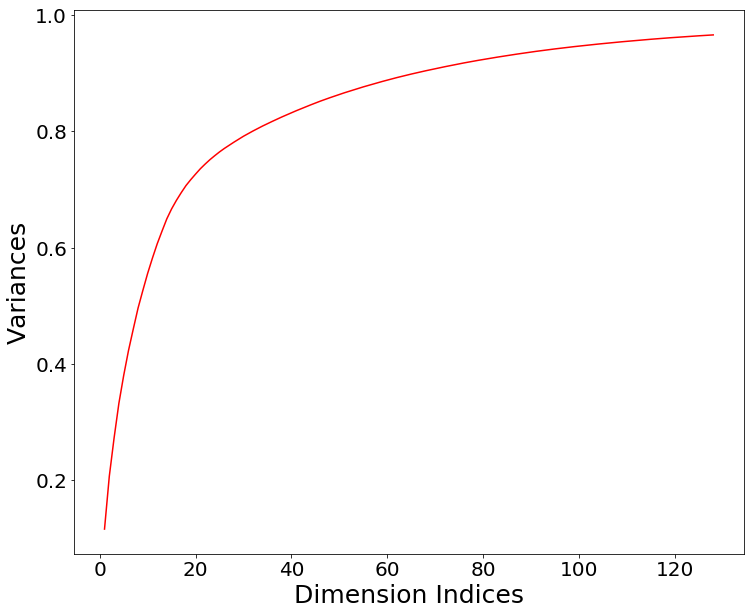

In [28]:
dims = [i[0] for i in sorted_by_value]
var = [i[1] for i in sorted_by_value]
v = []
for i in var:
    if len(v) == 0:
        v.append(i)
    else:
        v.append(v[-1]+i)
plt.figure(figsize=(12, 10))
plt.ylabel('Variances', fontsize=25)
plt.xlabel("Dimension Indices", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(dims, v, color='red', linestyle='solid')
plt.title('')
plt.savefig('pca.png',bbox_inches="tight", dpi=300)
plt.show()
